# A

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
train img shape : (800, 400, 400, 3), train mask shape : (800, 400, 400, 1)
test img shape : (100, 400, 400, 3), test mask shape : (100, 400, 400, 1)
train img shape : (800, 400, 400, 3), train mask shape : (800, 400, 400, 1)
test img shape : (100, 400, 400, 3), test mask shape : (100, 400, 400, 1)


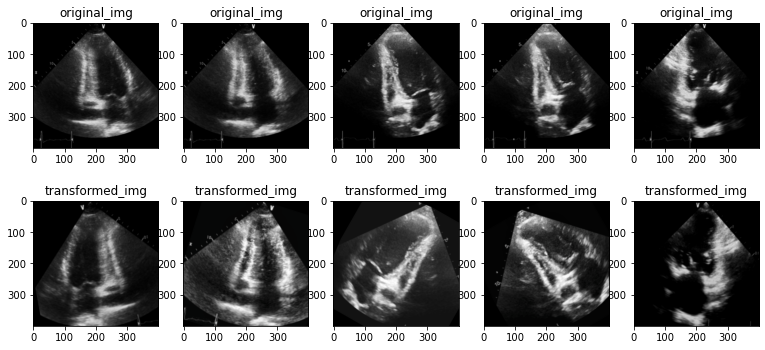

In [69]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import cv2

import albumentations as A
from albumentations.pytorch import ToTensorV2
from utils import make_dataloader

transform = A.Compose([
            # A.OneOf(
            #     [
            #         A.CLAHE(p=1),
            #         A.RandomBrightness(limit=(-0.05, 0.05), p=1),
            #         A.RandomContrast(limit=(-0.1, 0.1), p=1),
            #     ],
            #     p=0.5,
            # ),
            # A.Rotate(limit=(-7, -7), border_mode=0, p=0.5),
            # A.ShiftScaleRotate(shift_limit_x=(0.05, 0.05), shift_limit_y=(0.05, 0.05), rotate_limit=(0, 0), scale_limit=(0.1, 0.1), border_mode=0, p=1),
            # ToTensorV2(transpose_mask=True),

        A.OneOf(
                [
                    A.CLAHE(p=1),
                    A.RandomBrightness(p=1),
                    A.RandomContrast(p=1),
                ],
                p=0.5,
            ),
            A.HorizontalFlip(),
            A.Rotate(limit = 20),
            A.ShiftScaleRotate(shift_limit = 0.3),
            A.RandomScale(scale_limit = 0.3),
            ToTensorV2(transpose_mask=True)

        ])


# import dataset
origin_tr_loader, origin_ts_loader = make_dataloader('A2C', transform=False, random_seed=42, batch_size=5)
trans_tr_loader, tran_ts_loader = make_dataloader('A2C', transform=transform, random_seed=42, batch_size=5)

origin_img, origin_mask = next(iter(origin_tr_loader))
trans_img, trans_mask = next(iter(trans_tr_loader))

#
fig, subplots = plt.subplots(2, 5, figsize=(13, 6))
for i in range(5):
    axi1 = subplots.flat[i]
    axi2 = subplots.flat[i+5]
    
    axi1.imshow(origin_img[i].numpy())
    axi2.imshow(trans_img[i].numpy().transpose(1, 2, 0))

    axi1.set_title('original_img')
    axi2.set_title('transformed_img')